In [29]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
# Install XGBoost
%pip install xgboost
import xgboost as xgb


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Load the first sheet in the dataset
file_path = 'C:/Users/Monir/OneDrive/Documents/R/cat/Malaria-data_Revised.xlsx'  # Update this path
data = pd.read_excel(file_path, sheet_name=0)  # Load only the first sheet


In [5]:
data

,Year,Month,PF,PV,Humidity (%),Rainfall (mm),Temperature ©,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,2021,Jan,1.89,0.00,71,0.03,21.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021,Feb,0.00,1.89,69,0.00,21.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021,Mar,1.89,0.00,73,0.01,25.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021,Apr,1.89,1.89,76,0.31,27.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021,May,3.77,1.89,79,2.56,28.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2021,Jun,5.66,3.77,83,32.00,26.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2021,Jul,9.43,3.77,86,31.06,27.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2021,Aug,16.98,9.43,85,13.87,26.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2021,Sep,11.32,7.55,82,9.59,26.91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021,Oct,7.55,3.77,81,5.77,27.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Drop columns with all NaN values (previous step) and then drop any remaining rows with NaNs
data_cleaned = data.dropna(axis=1, how='all').dropna()
print(data_cleaned )

    Year Month     PF    PV  Humidity (%)  Rainfall (mm)  Temperature ©
0   2021   Jan   1.89  0.00            71           0.03          21.14
1   2021   Feb   0.00  1.89            69           0.00          21.35
2   2021   Mar   1.89  0.00            73           0.01          25.97
3   2021   Apr   1.89  1.89            76           0.31          27.79
4   2021   May   3.77  1.89            79           2.56          28.72
5   2021   Jun   5.66  3.77            83          32.00          26.95
6   2021   Jul   9.43  3.77            86          31.06          27.10
7   2021   Aug  16.98  9.43            85          13.87          26.89
8   2021   Sep  11.32  7.55            82           9.59          26.91
9   2021   Oct   7.55  3.77            81           5.77          27.12
10  2021   Nov   3.77  0.00            78           0.00          25.19
11  2021   Dec   0.00  1.89            73           1.03          21.97
12  2022   Jan   0.00  0.00            69           0.24        

In [7]:
data_cleaned

,Year,Month,PF,PV,Humidity (%),Rainfall (mm),Temperature ©,Unnamed: 15
20,2022,Sep,6.33,3.8,82,9.67,27.32,


In [10]:
# Drop the specific column "Unnamed: 15" if it exists
if 'Unnamed: 15' in data.columns:
    data = data.drop(columns=['Unnamed: 15'])

In [11]:
data_cleaned

,Year,Month,PF,PV,Humidity (%),Rainfall (mm),Temperature ©,Unnamed: 15
20,2022,Sep,6.33,3.8,82,9.67,27.32,


In [12]:
print(data_cleaned.describe())

         Year    PF   PV  Humidity (%)  Rainfall (mm)  Temperature ©
count     1.0  1.00  1.0           1.0           1.00           1.00
mean   2022.0  6.33  3.8          82.0           9.67          27.32
std       NaN   NaN  NaN           NaN            NaN            NaN
min    2022.0  6.33  3.8          82.0           9.67          27.32
25%    2022.0  6.33  3.8          82.0           9.67          27.32
50%    2022.0  6.33  3.8          82.0           9.67          27.32
75%    2022.0  6.33  3.8          82.0           9.67          27.32
max    2022.0  6.33  3.8          82.0           9.67          27.32


In [13]:
 print(data_cleaned.isnull().sum())

Year             0
Month            0
PF               0
PV               0
Humidity (%)     0
Rainfall (mm)    0
Temperature ©    0
Unnamed: 15      0
dtype: int64


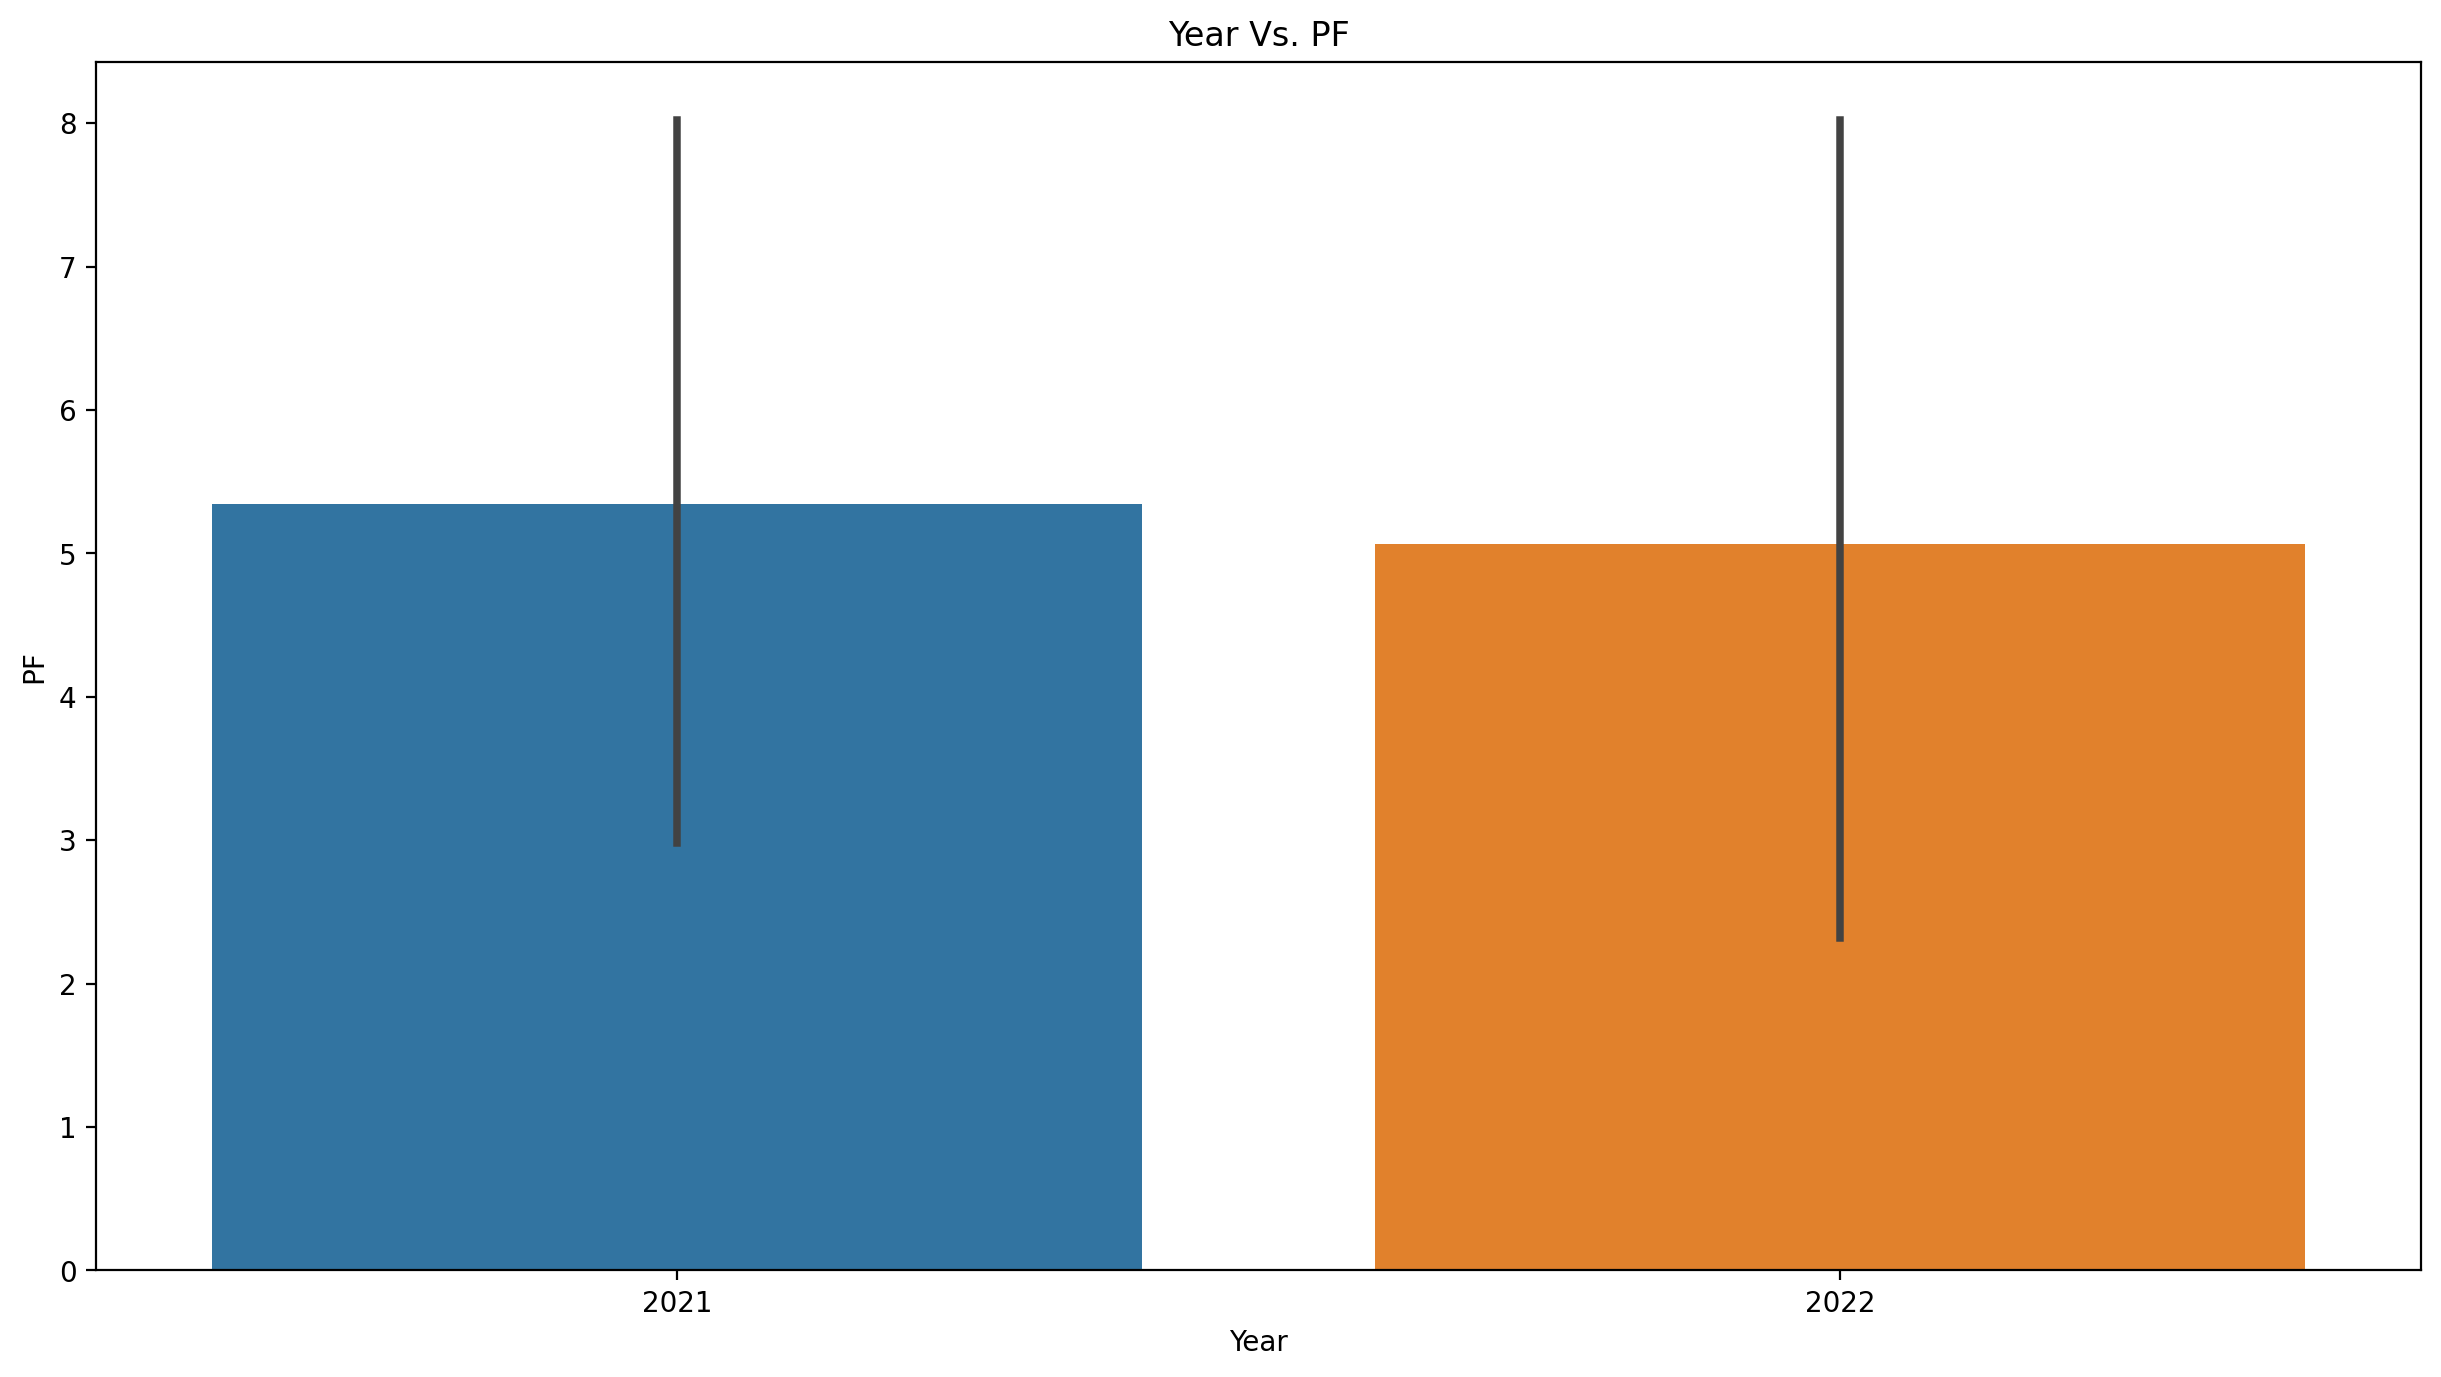

In [18]:
plt.figure(figsize=(15,8),dpi=200)
sns.barplot(data=data_cleaned, x='Year', y='PF')
plt.xlabel("Year")
plt.ylabel("PF")
plt.title("Year Vs. PF")
plt.show();

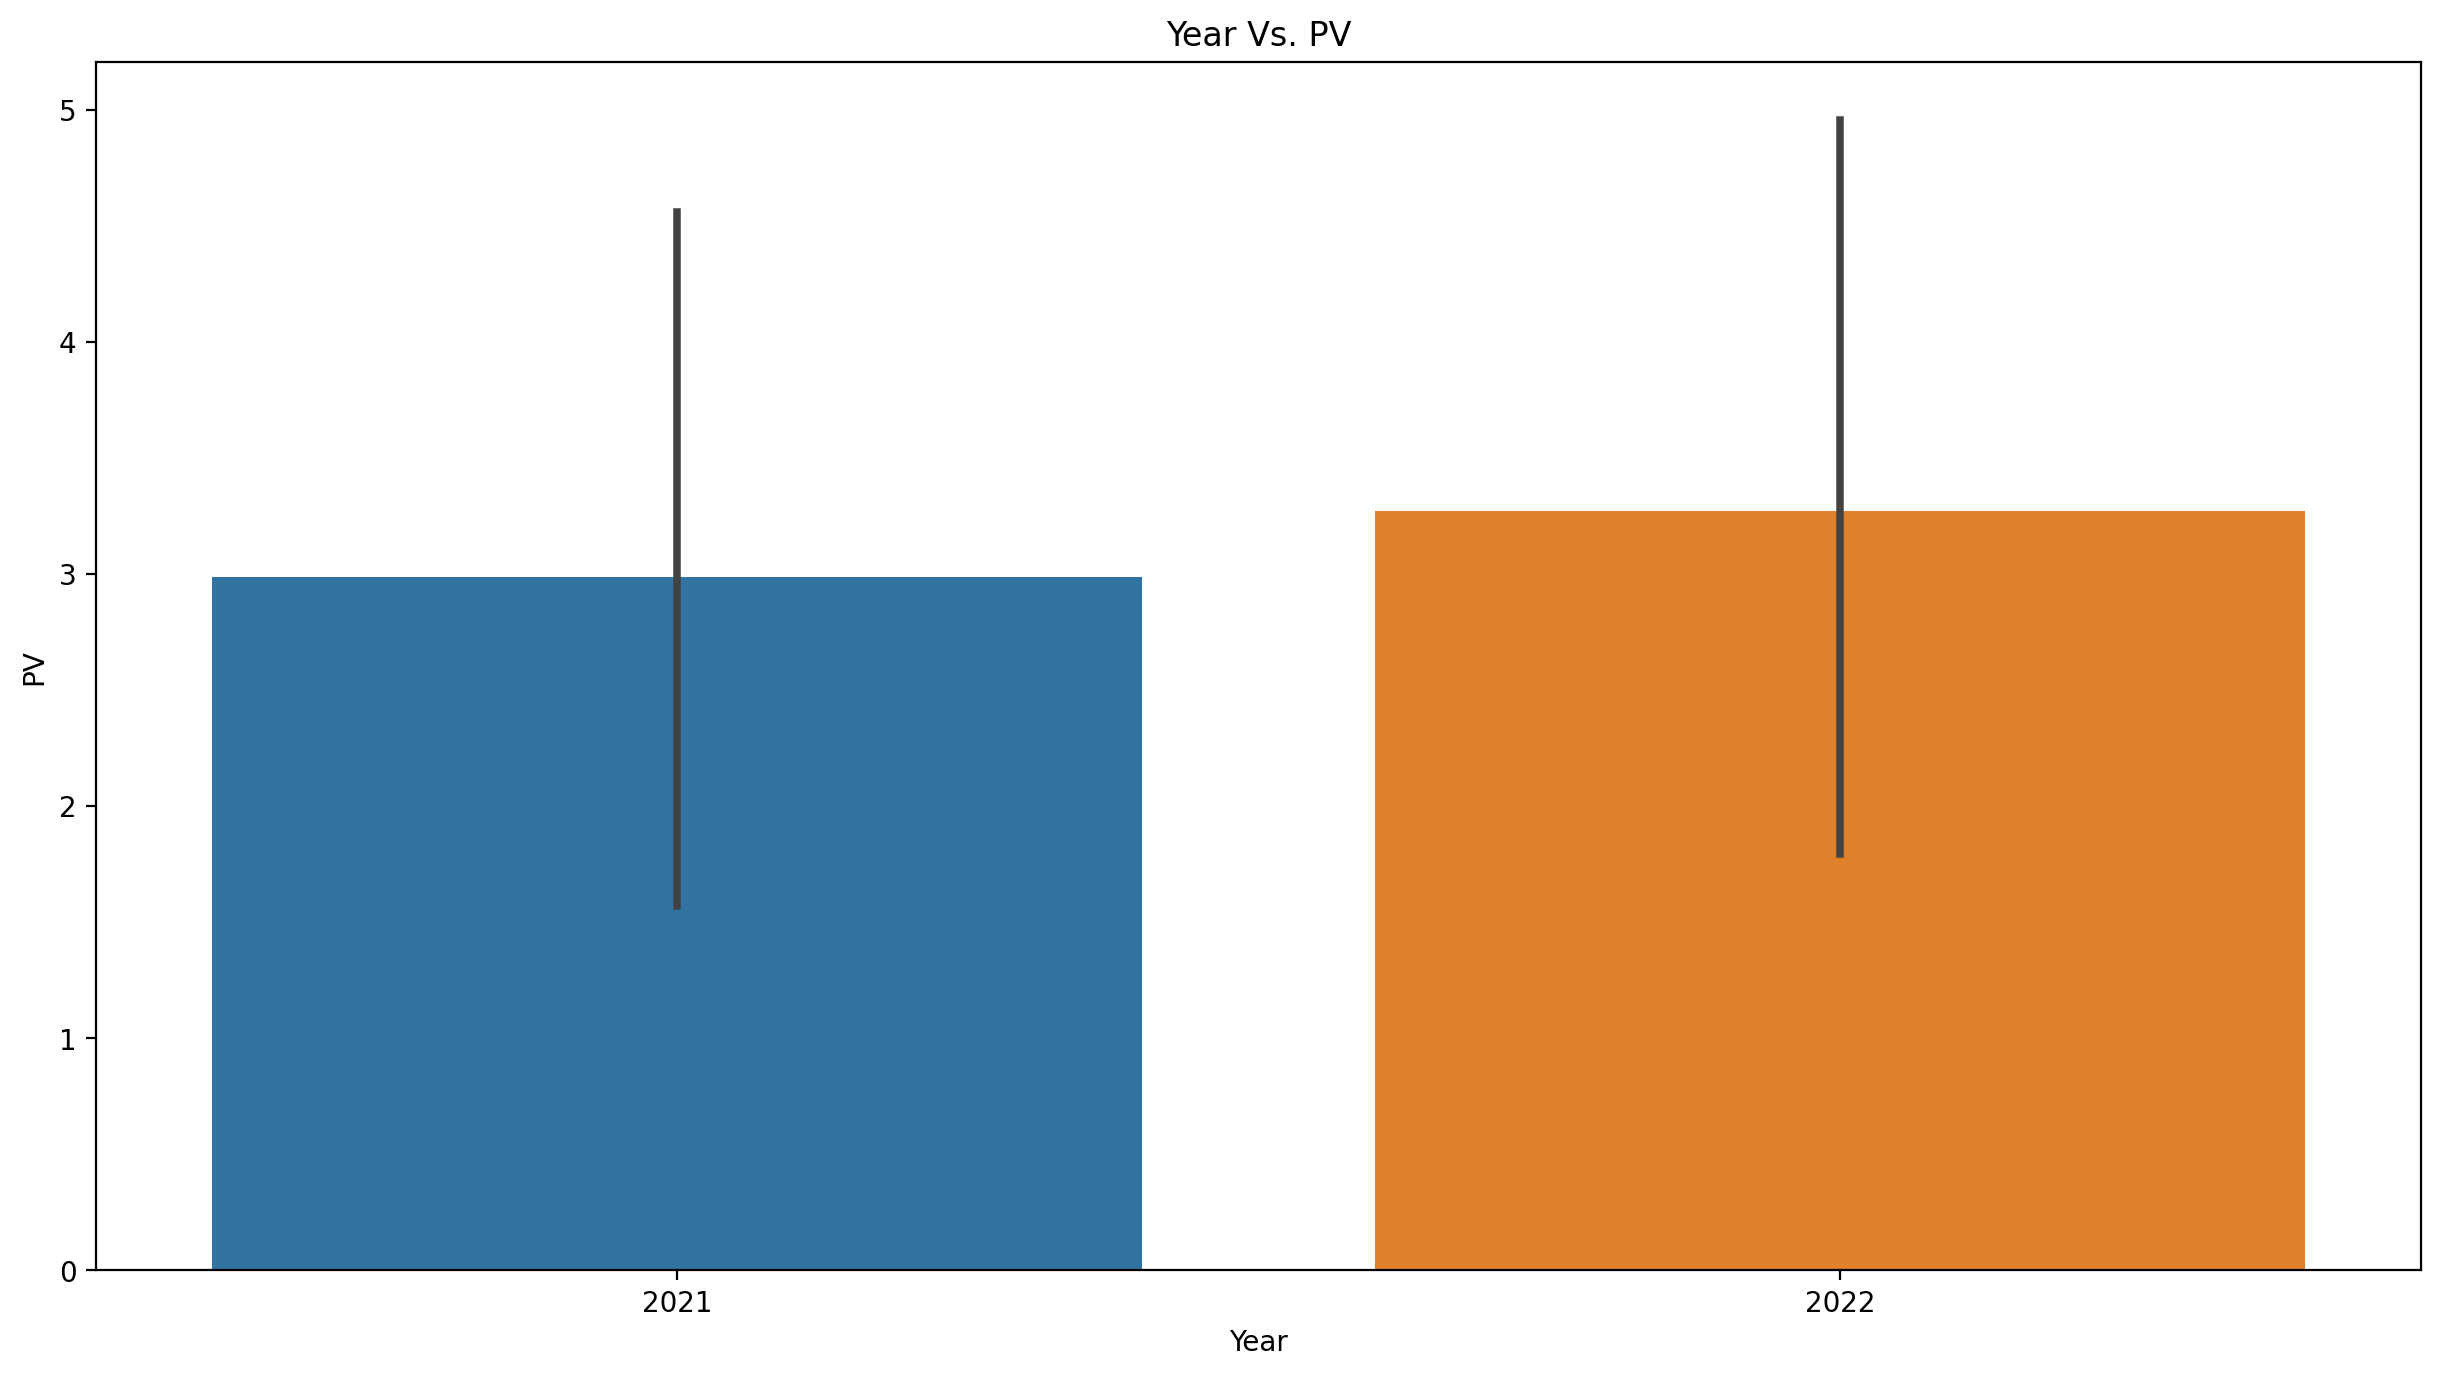

In [19]:
plt.figure(figsize=(15,8),dpi=200)
sns.barplot(data=data_cleaned, x='Year', y='PV')
plt.xlabel("Year")
plt.ylabel("PV")
plt.title("Year Vs. PV")
plt.show();

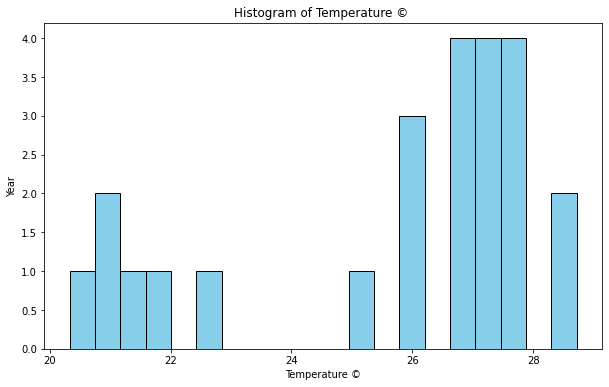

In [20]:
# Sample histogram using the hypothetical column 'Values'
plt.figure(figsize=(10, 6))
plt.hist( data_cleaned['Temperature ©'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Temperature ©')
plt.ylabel('Year')
plt.title('Histogram of Temperature © ')
plt.show()


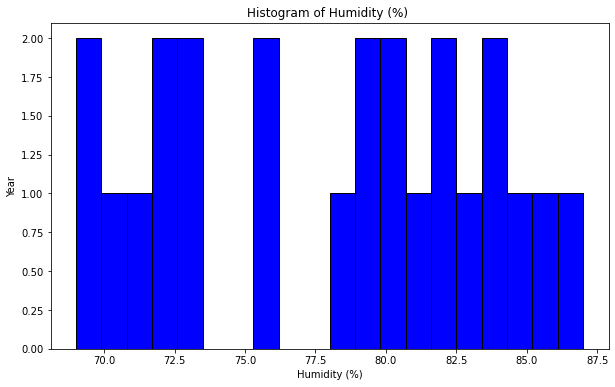

In [22]:
# Sample histogram using the hypothetical column 'Values'
plt.figure(figsize=(10, 6))
plt.hist( data_cleaned['Humidity (%)'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Humidity (%)')
plt.ylabel('Year')
plt.title('Histogram of Humidity (%) ')
plt.show()

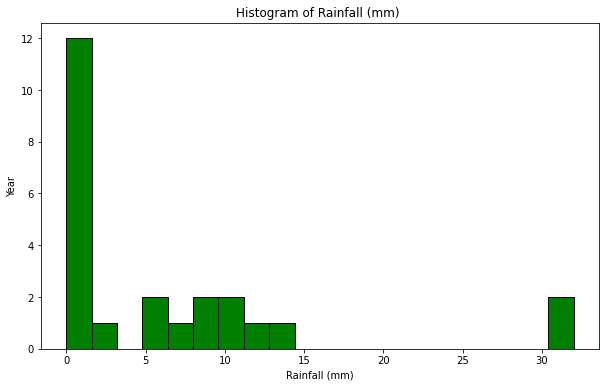

In [27]:
# Sample histogram using the hypothetical column 'Values'
plt.figure(figsize=(10, 6))
plt.hist( data_cleaned['Rainfall (mm)'], bins=20, color='green', edgecolor='black')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Year')
plt.title('Histogram of Rainfall (mm) ')
plt.show()

In [ ]:
# Calculate correlation matrix
correlations = data_cleaned.corr()

In [40]:
correlations

,Year,PF,PV,Humidity (%),Rainfall (mm),Temperature ©
Year,1.000000,-0.028580,0.048917,-0.007469,-0.182510,0.034221
PF,-0.028580,1.000000,0.920865,0.851334,0.527291,0.531934
PV,0.048917,0.920865,1.000000,0.807503,0.479794,0.500940
Humidity (%),-0.007469,0.851334,0.807503,1.000000,0.681306,0.778233
Rainfall (mm),-0.182510,0.527291,0.479794,0.681306,1.000000,0.391491
Temperature ©,0.034221,0.531934,0.500940,0.778233,0.391491,1.000000


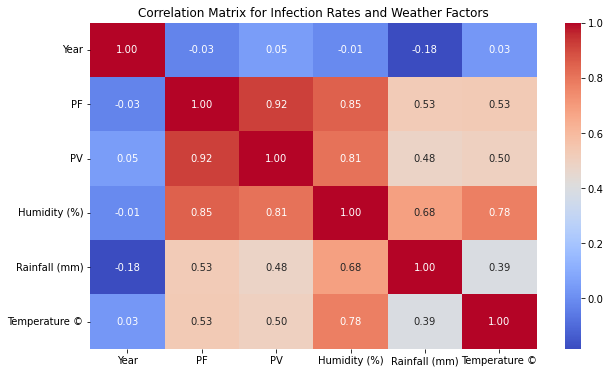

In [41]:
# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Infection Rates and Weather Factors")
plt.show()

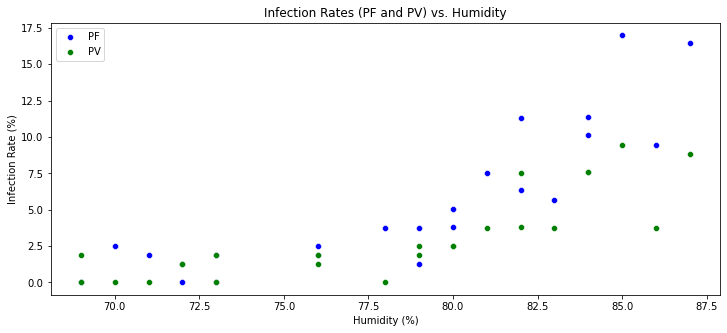

In [42]:
# Scatter plot for infection rates vs. Humidity
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data_cleaned, x="Humidity (%)", y="PF", label="PF", color="blue")
sns.scatterplot(data=data_cleaned, x="Humidity (%)", y="PV", label="PV", color="green")
plt.title("Infection Rates (PF and PV) vs. Humidity")
plt.xlabel("Humidity (%)")
plt.ylabel("Infection Rate (%)")
plt.legend()
plt.show()

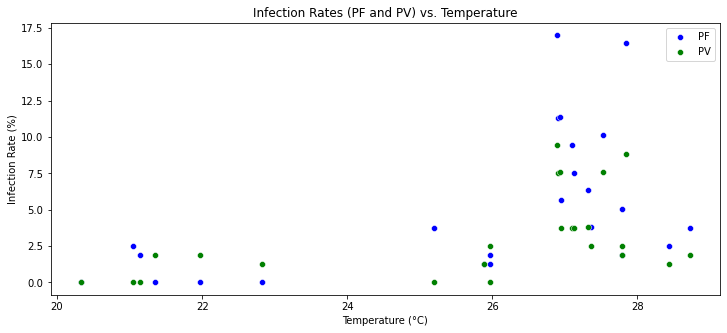

In [43]:
# Scatter plot for infection rates vs. Temperature
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data_cleaned, x="Temperature ©", y="PF", label="PF", color="blue")
sns.scatterplot(data=data_cleaned, x="Temperature ©", y="PV", label="PV", color="green")
plt.title("Infection Rates (PF and PV) vs. Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Infection Rate (%)")
plt.legend()
plt.show()

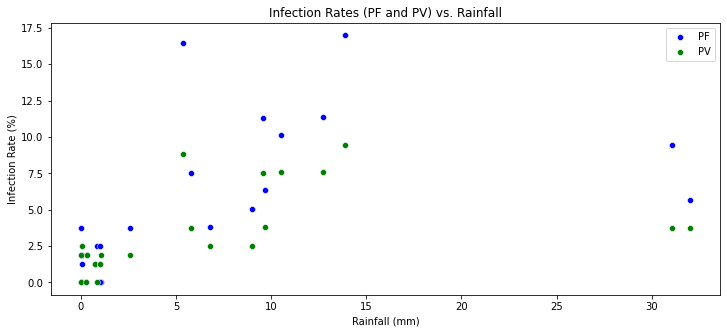

In [45]:
#Scatter plot for infection rates vs. Rainfall
plt.figure(figsize=(12, 5))
sns.scatterplot(data=data_cleaned, x="Rainfall (mm)", y="PF", label="PF", color="blue")
sns.scatterplot(data=data_cleaned, x="Rainfall (mm)", y="PV", label="PV", color="green")
plt.title("Infection Rates (PF and PV) vs. Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Infection Rate (%)")
plt.legend()
plt.show()

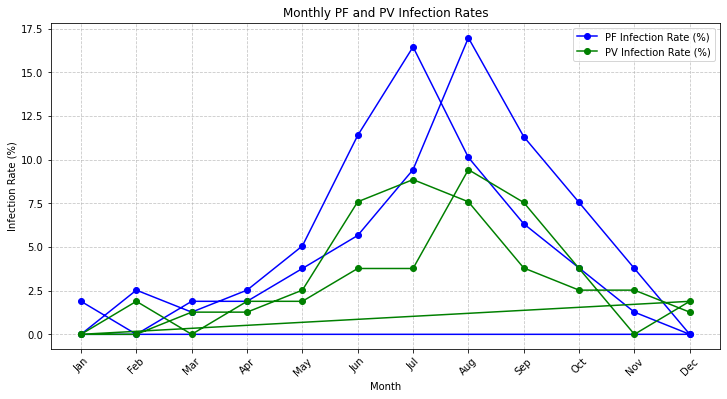

In [46]:
# Basic line plot of PF and PV infection rates over time (Month)
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Month'], data_cleaned['PF'], marker='o', label='PF Infection Rate (%)', color='blue')
plt.plot(data_cleaned['Month'], data_cleaned['PV'], marker='o', label='PV Infection Rate (%)', color='green')
plt.title("Monthly PF and PV Infection Rates")
plt.xlabel("Month")
plt.ylabel("Infection Rate (%)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()


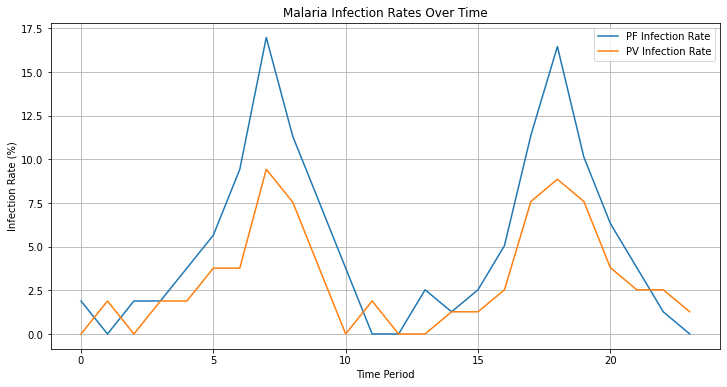

In [28]:
# Create a time series plot of PF and PV infection rates
plt.figure(figsize=(12, 6))
plt.plot(range(len(data_cleaned)), data_cleaned['PF'], label='PF Infection Rate')
plt.plot(range(len(data_cleaned)),data_cleaned['PV'], label='PV Infection Rate')
plt.title('Malaria Infection Rates Over Time')
plt.xlabel('Time Period')
plt.ylabel('Infection Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [42]:

X = data_cleaned[['Humidity (%)', 'Rainfall (mm)', 'Temperature \u00a9']]
y_pf = data_cleaned['PF']
y_pv = data_cleaned['PV']

# Split data
X_train, X_test, y_pf_train, y_pf_test = train_test_split(X, y_pf, test_size=0.2, random_state=42)
_, _, y_pv_train, y_pv_test = train_test_split(X, y_pv, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42)
}

# Train and evaluate models
results = []
predictions_pf = {}
predictions_pv = {}
for name, model in models.items():
    # For PF
    model.fit(X_train, y_pf_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pf_test, y_pred)
    r2 = r2_score(y_pf_test, y_pred)
    results.append([name, 'PF', np.sqrt(mse), r2])
    
    # For PV
    model.fit(X_train, y_pv_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_pv_test, y_pred)
    r2 = r2_score(y_pv_test, y_pred)
    results.append([name, 'PV', np.sqrt(mse), r2])
    
   

# Create results DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'RMSE', 'R2'])
print('Model Performance Comparison:')
print(results_df)

# Feature importance for Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_pf_train)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})
print('\
Feature Importance (Random Forest for PF):')
print(feature_importance.sort_values('Importance', ascending=False))

Model Performance Comparison:
               Model Target      RMSE        R2
0  Linear Regression     PF  2.689236  0.806647
1  Linear Regression     PV  1.535238  0.799228
2              Ridge     PF  2.715020  0.802922
3              Ridge     PV  1.548807  0.795663
4              Lasso     PF  3.291253  0.710389
5              Lasso     PV  2.027948  0.649680
6      Random Forest     PF  3.646279  0.644538
7      Random Forest     PV  2.019948  0.652438
8            XGBoost     PF  3.495293  0.673367
9            XGBoost     PV  2.691238  0.383042
Feature Importance (Random Forest for PF):
         Feature  Importance
0   Humidity (%)    0.670581
1  Rainfall (mm)    0.244724
2  Temperature ©    0.084694


No handles with labels found to put in legend.


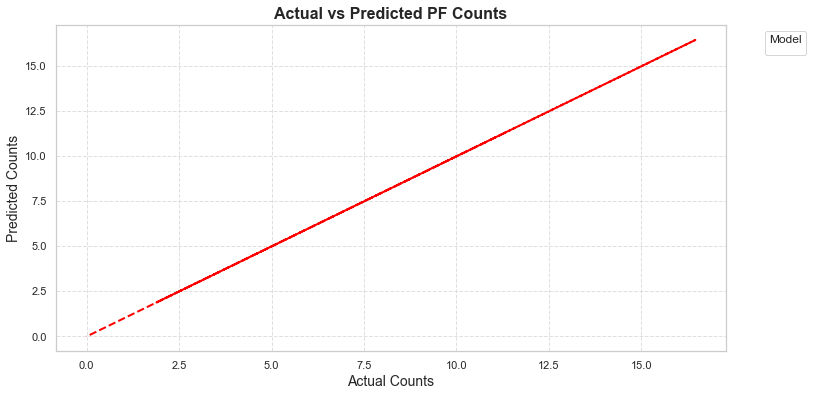

No handles with labels found to put in legend.


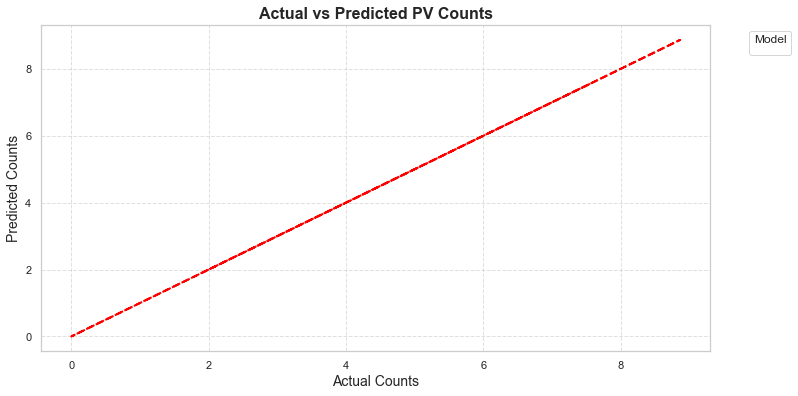

In [45]:
# Set Seaborn style for vibrant colors
sns.set(style="whitegrid", palette="muted", color_codes=True)

# Plot actual vs predicted for PF and PV targets
for target, preds, y_test in zip(['PF', 'PV'], [predictions_pf, predictions_pv], [y_pf_test, y_pv_test]):
    plt.figure(figsize=(12, 6))
    colors = sns.color_palette("husl", len(preds))  # Use a colorful Husl palette
    for color, (model_name, y_pred) in zip(colors, preds.items()):
        sns.scatterplot(x=y_test, y=y_pred, label=model_name, color=color, s=50, alpha=0.7, edgecolor="k")
    plt.plot(y_test, y_test, color='red', linestyle='--', linewidth=2)  # Line for perfect prediction
    plt.title(f'Actual vs Predicted {target} Counts', fontsize=16, weight='bold')
    plt.xlabel('Actual Counts', fontsize=14)
    plt.ylabel('Predicted Counts', fontsize=14)
    plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

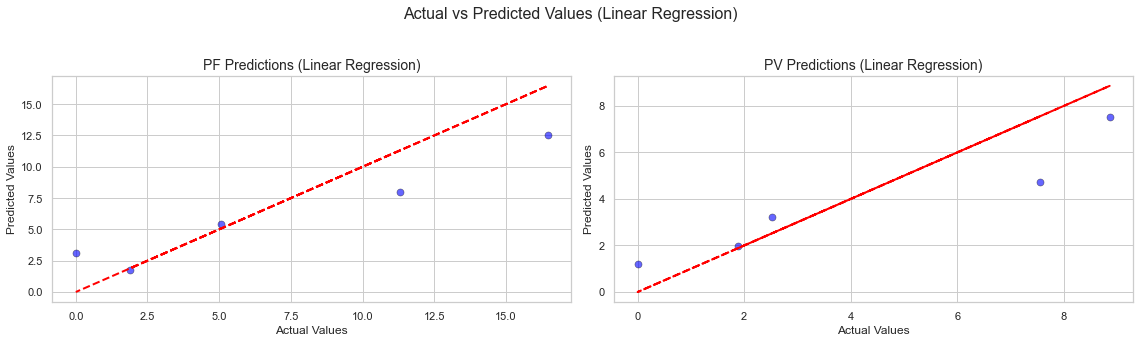

In [53]:
# Initialize and fit the Linear Regression model for PF and PV
linear_regression_model = LinearRegression()

# PF predictions
linear_regression_model.fit(X_train, y_pf_train)
y_pf_pred = linear_regression_model.predict(X_test)

# PV predictions
linear_regression_model.fit(X_train, y_pv_train)
y_pv_pred = linear_regression_model.predict(X_test)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# PF plot
sns.scatterplot(x=y_pf_test, y=y_pf_pred, ax=axes[0], color="blue", s=50, alpha=0.6, edgecolor="k")
axes[0].plot(y_pf_test, y_pf_test, color='red', linestyle='--', linewidth=2)
axes[0].set_title("PF Predictions (Linear Regression)", fontsize=14)
axes[0].set_xlabel("Actual Values", fontsize=12)
axes[0].set_ylabel("Predicted Values", fontsize=12)

# PV plot
sns.scatterplot(x=y_pv_test, y=y_pv_pred, ax=axes[1], color="blue", s=50, alpha=0.6, edgecolor="k")
axes[1].plot(y_pv_test, y_pv_test, color='red', linestyle='--', linewidth=2)
axes[1].set_title("PV Predictions (Linear Regression)", fontsize=14)
axes[1].set_xlabel("Actual Values", fontsize=12)
axes[1].set_ylabel("Predicted Values", fontsize=12)

# Show the plot
plt.suptitle("Actual vs Predicted Values (Linear Regression)", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [51]:
 Linear_Regression= models['Linear Regression']

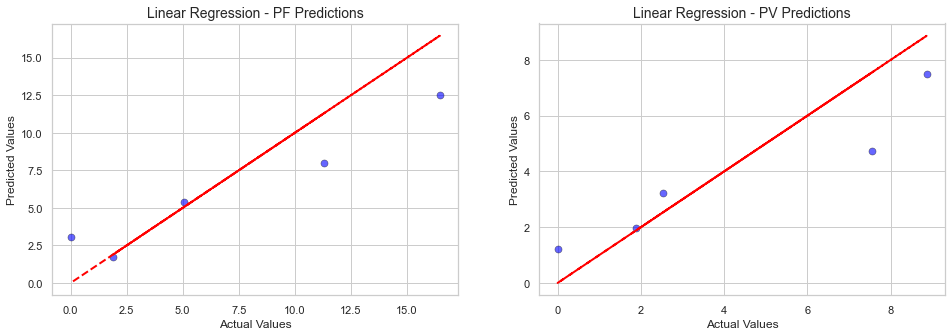

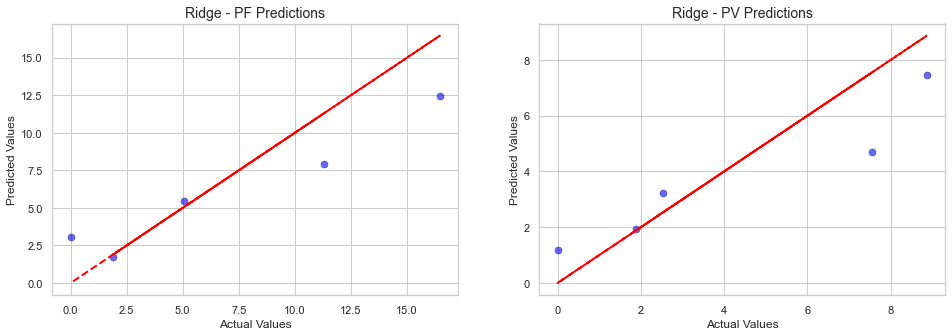

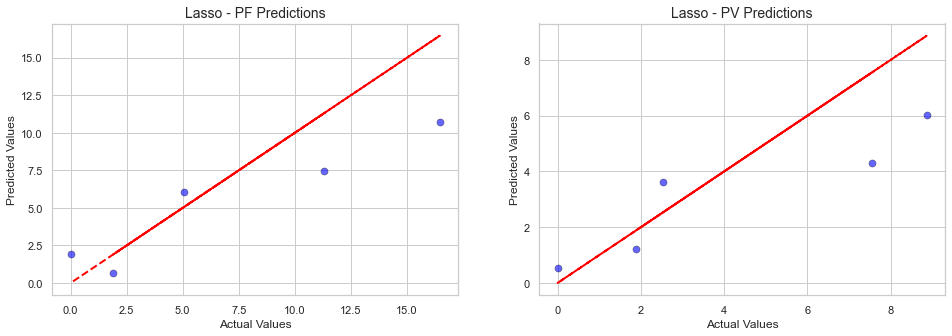

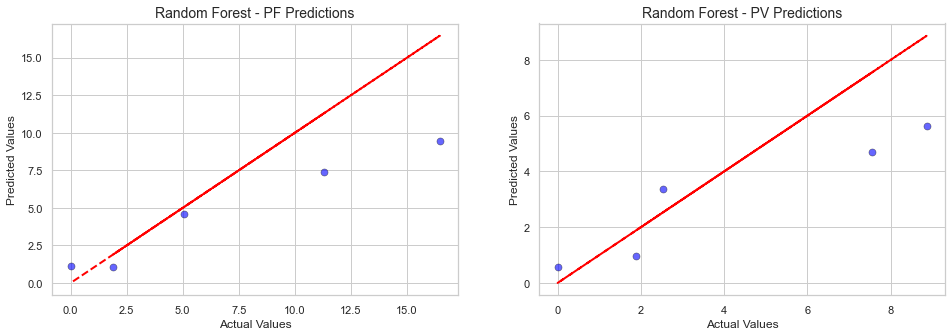

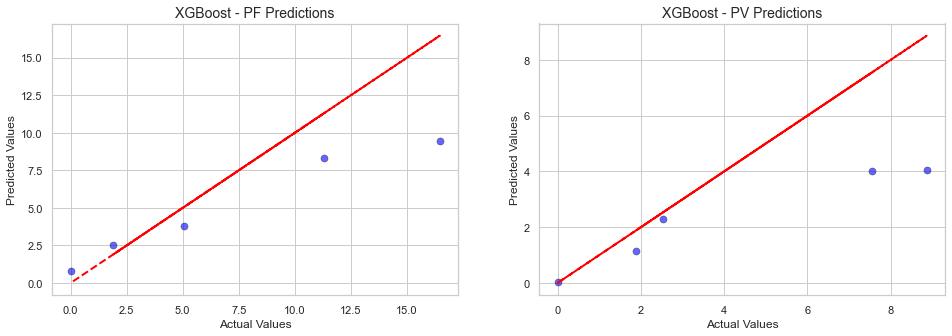

In [65]:
# Iterate over models and plot predictions
for model_name, model in models.items():
    # Train and predict for PF
    model.fit(X_train, y_pf_train)
    y_pf_pred = model.predict(X_test)
    
    # Train and predict for PV
    model.fit(X_train, y_pv_train)
    y_pv_pred = model.predict(X_test)
    
    # Plotting
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    # PF plot
    sns.scatterplot(x=y_pf_test, y=y_pf_pred, ax=axes[0], color="blue", s=50, alpha=0.6, edgecolor="k")
    axes[0].plot(y_pf_test, y_pf_test, color='red', linestyle='--', linewidth=2)
    axes[0].set_title(f"{model_name} - PF Predictions", fontsize=14)
    axes[0].set_xlabel("Actual Values", fontsize=12)
    axes[0].set_ylabel("Predicted Values", fontsize=12)
    
    # PV plot
    sns.scatterplot(x=y_pv_test, y=y_pv_pred, ax=axes[1], color="blue", s=50, alpha=0.6, edgecolor="k")
    axes[1].plot(y_pv_test, y_pv_test, color='red', linestyle='--', linewidth=2)
    axes[1].set_title(f"{model_name} - PV Predictions", fontsize=14)
    axes[1].set_xlabel("Actual Values", fontsize=12)
    axes[1].set_ylabel("Predicted Values", fontsize=12)

In [60]:
 model.fit(X_train, y_pv_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [70]:
linear_regression_model = LinearRegression()

In [67]:
linear_regression_model

LinearRegression()

In [72]:
print(model.fit(X_train, y_pf_train) )

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)


In [73]:
y_pf_pred = model.predict(X_test)

In [74]:
y_pf_pred 

array([8.308589  , 3.8100412 , 2.5265925 , 9.430251  , 0.79482615],
      dtype=float32)

In [76]:
# Initialize and fit the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_pf_train)

# Get coefficients and intercept
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (PF)': linear_model.coef_
})
intercept = linear_model.intercept_

print("Linear Regression Coefficients for PF:")
print(coefficients)
print("\nIntercept:", intercept)


Linear Regression Coefficients for PF:
         Feature  Coefficient (PF)
0   Humidity (%)          0.990409
1  Rainfall (mm)         -0.062872
2  Temperature ©         -0.703974

Intercept: -53.68922629019457


In [77]:
# Define target (y) for PV
y_pv = data_cleaned['PV']

# Split the data
_, _, y_pv_train, y_pv_test = train_test_split(X, y_pv, test_size=0.2, random_state=42)

# Fit the Linear Regression model for PV
linear_model.fit(X_train, y_pv_train)

# Get coefficients and intercept for PV
coefficients_pv = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient (PV)': linear_model.coef_
})
intercept_pv = linear_model.intercept_

print("\nLinear Regression Coefficients for PV:")
print(coefficients_pv)
print("\nIntercept:", intercept_pv)



Linear Regression Coefficients for PV:
         Feature  Coefficient (PV)
0   Humidity (%)          0.587153
1  Rainfall (mm)         -0.055574
2  Temperature ©         -0.418272

Intercept: -31.639123368963958


In [79]:
# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Model', 'Target', 'RMSE', 'R2'])
print('Model Performance Comparison:')
print(results_df)

Model Performance Comparison:
               Model Target      RMSE        R2
0  Linear Regression     PF  2.689236  0.806647
1  Linear Regression     PV  1.535238  0.799228
2              Ridge     PF  2.715020  0.802922
3              Ridge     PV  1.548807  0.795663
4              Lasso     PF  3.291253  0.710389
5              Lasso     PV  2.027948  0.649680
6      Random Forest     PF  3.646279  0.644538
7      Random Forest     PV  2.019948  0.652438
8            XGBoost     PF  3.495293  0.673367
9            XGBoost     PV  2.691238  0.383042
